# MNIST
## 70,000 images of digits

In [45]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import SGDClassifier
import numpy as np

In [46]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [47]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [48]:
try:
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [49]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [50]:
y.shape

(70000,)

In [51]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [93]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

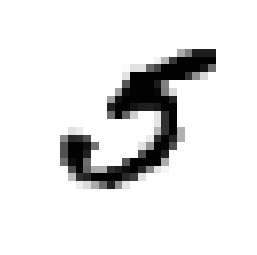

In [94]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [96]:
y[36000] # The label for the value stored at index 36000 is 5 as expected.

5

In [97]:
# Test set created:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [98]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [99]:
# Target vectors
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [100]:
# Stochastic Gradient Descent
sgd_classifier = SGDClassifier(random_state = 42)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
sgd_classifier.predict([some_digit])

array([ True])

# Cross validation for performance measure

In [102]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9284, 0.9407, 0.9593])

In [103]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [104]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

In [105]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_classifier)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9284
0.9407
0.9593


In [107]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [108]:
never_5_clf = Never5Classifier()

In [109]:
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.91   , 0.91095, 0.908  ])

In [110]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv = 3)

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53188,  1391],
       [ 2041,  3380]])

In [112]:
# Classifier metrics, precision and recall.
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7084468664850136

In [113]:
recall_score(y_train_5, y_train_pred)

0.6235011990407674

In [114]:
# Calculating the F1 score:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.663265306122449

In [115]:
y_scores = sgd_classifier.decision_function([some_digit])

In [116]:
y_scores

array([41706.86114724])

# “This confirms that raising the threshold decreases recall.”

Excerpt From: Aurélien Géron. “Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems.” iBooks. 

In [117]:
threshold = 0

In [118]:
y_some_digit_pred = (y_scores > threshold)

In [119]:
y_some_digit_pred

array([ True])

In [120]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

## Finding the best threshold to use.

In [121]:
#1
y_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv = 3, 
                             method = "decision_function")

In [123]:
#2
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train_5, y_scores)

In [ ]:
#3
def plot_precision_recall_vs_threshold(precision)